# Predicting MLB Pitchers' Salaries

#### Project Purpose

The goal of this project is to build a model that is capable of predicting salaries for pitchers in Major League Baseball.  

#### Data Background

The data was downloaded from baseball-reference.com and it consists of 14,405 entries.  Included in the unbalanced panel are ptiching statistics and salaries for MLB pitchers between 1997-2019.  This time frame was chosen for two reasons:  the salary data is more complete than earlier years and prior to the 1997 Collective Bargaining Agreement, there was a lot of tension between owners and players which resulted in a strike in 1994.  By collecting data from 1997 on, we are able to have a large dataset that is a few years out from the major tensions in MLB.

The data set includes both starting pitchers and relief pitchers.  They have wholly different job descriptions.  To account for this, a dummy variable is included, equal to one for starting pitchers.  Also included, to add another dimension of separation between pitchers, are dummy variables for individual awards, equal to one if a pitcher had previously won a pitching award.

Not included in the dataset are batting statistics.  This data was excluded for two reasons.  First, pitchers are not paid to bat.  They are notoriously bad at it.  Second, the American League and National League play by a different set of rules.  The American League uses a designatted hitter in place of the pitcher in the batting order.  Due to this, there is not enough AL ptiching data to include in the model.

#### Assumptions with the Data

The data had been previoulsy cleaned as it was used for another project.  There are no missing entries for any player in the dataset.  It is important to note some assumptions taken within the data set, however.  Originally, some pitchers were missing salaries.  Due to the structure of MLB CBA's, players with 1-3 years of experience are typically paid league minimum.  Any players that were in their first three years of service AND missing a salary entry were given the league minimum for that year.  For players outside three years of service up to five years were given the league average for the year.  Players with more than five years of experience are under contract.  This data is much more complete.  For players that signed multiyear contracts, the total dollar amount of the contract was averaged over the contract length.

### IMPORTING THE DATA

In [1]:
# import common packages

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# change working directory

os.chdir("C:\\Users\gowgi\Desktop\pandas")
os.getcwd()

'C:\\Users\\gowgi\\Desktop\\pandas'

In [126]:
# import the dataset

df = pd.read_csv('ML_Project_Data.csv')

In [127]:
# summary statistics

df.describe()

,year,age,salary,cpi,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf
count,14404.000000,14404.000000,1.440400e+04,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14402.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000
mean,2009.060400,28.017356,1.914667e+06,213.206725,3.597751,3.592960,0.391883,5.383334,27.614482,7.242224,6.848861,0.224035,0.087962,1.821647,63.865010,275.566995,104.379617,4.884161,1.550349,9.845605,1.282519,4.111976,7.167099,2.173659,2.503263,2.553388,2.185782,0.167017,2.421834,40.345598,0.627590,0.324840,20.373230,1.094557,1.039642,2.698139,0.876493,0.135709,5.976257,3.071438,2.958206,16.981739,0.003055,0.000486,0.003055,0.000139,0.003124,0.002985,1444.921779,6222.800403
std,6.369337,4.115392,3.465243e+06,28.177590,4.335904,3.762203,0.307814,5.714502,21.211607,11.095916,11.307613,0.792331,0.369792,6.735049,60.764164,256.181570,62.532276,2.628345,0.786951,5.057429,1.409057,3.463113,2.751871,1.431927,4.517602,3.978942,3.422269,0.244642,2.737201,44.898305,1.427634,0.468331,24.136964,1.764029,1.643300,7.809078,1.649266,0.291170,10.603925,5.831889,2.316330,13.101888,0.055187,0.022040,0.055187,0.011783,0.055808,0.054558,13.376732,119.255437
min,1998.000000,19.000000,1.000000e+05,163.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1411.200000,5866.000000
25%,2004.000000,25.000000,3.900000e+05,188.910000,0.000000,1.000000,0.000000,3.380000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,76.000000,72.000000,3.670000,1.237000,7.800000,0.700000,2.600000,5.500000,1.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1436.000000,6141.000000
50%,2009.000000,27.000000,5.096750e+05,215.250000,2.000000,2.000000,0.429000,4.440000,24.000000,0.000000,2.000000,0.000000,0.000000,0.000000,46.100000,202.000000,96.000000,4.440000,1.418000,9.100000,1.100000,3.500000,7.000000,1.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1444.100000,6219.000000
75%,2015.000000,30.000000,1.687500e+06,237.000000,5.000000,6.000000,0.600000,5.860000,38.000000,12.000000,9.000000,0.000000,0.000000,0.000000,83.200000,359.000000,123.000000,5.380000,1.660000,10.700000,1.500000,4.700000,8.700000,2.712500,3.000000,4.000000,4.000000,0.370000,5.400000,90.000000,1.100000,1.000000,36.000000,2.000000,2.000000,2.000000,1.000000,0.000000,7.000000,3.000000,3.900000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1453.200000,6305.000000
max,2019.000000,49.000000,3.750556e+07,255.650000,24.000000,21.000000,1.000000,189.000000,94.000000,36.000000,79.000000,15.000000,6.000000,62.000000,271.200000,1102.000000,1221.000000,84.210000,24.000000,189.000000,54.00000

### CLEANING THE DATA

In [5]:
# view all columns in the dataset

pd.set_option('max_columns', None)
df

,name,code,year,age,tm,lg,salary,cpi,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf
0,Greg Maddux,maddugr01,1998,32,ATL,NL,9600000,163.01,18,9,0.667,2.22,34,34,0,9,5,0,251.0,987,187,2.81,0.980,7.2,0.5,1.6,7.3,4.53,18,9,7,0.79,7.4,97,6.6,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,1,0,1438.2,5967
1,Roger Clemens,clemero02,1998,35,TOR,AL,8550000,163.01,20,6,0.769,2.65,33,33,0,5,3,0,234.2,961,174,2.65,1.095,6.5,0.4,3.4,10.4,3.08,20,6,7,0.73,7.1,115,8.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,1,1,0,0,0,1465.0,6352
2,John Smoltz,smoltjo01,1998,31,ATL,NL,7750000,163.01,17,3,0.850,2.90,26,26,0,2,2,0,167.2,681,144,2.71,1.127,7.8,0.5,2.4,9.3,3.93,17,3,6,0.65,6.4,93,3.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1438.2,5967
3,Pedro Martinez,martipe02,1998,26,BOS,AL,7575000,163.01,19,7,0.731,2.89,33,33,0,3,2,0,233.2,951,163,3.40,1.091,7.2,1.0,2.6,9.7,3.75,19,7,7,0.76,7.1,113,7.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1436.0,6141
4,Tom Glavine,glavito02,1998,32,ATL,NL,7000000,163.01,20,6,0.769,2.47,33,33,0,4,3,0,229.1,934,168,3.50,1.203,7.9,0.5,2.9,6.2,2.12,20,6,7,0.79,6.9,108,6.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,1,0,0,0,1438.2,5967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,Ross Detwiler,detwiro01,2019,33,CHW,AL,100000,255.65,3,5,0.375,6.59,18,12,2,0,0,0,69.2,315,70,6.92,1.622,11.1,2.6,3.5,5.9,1.70,3,5,4,0.17,4.8,79,-0.4,1,6,0,0,0,0,0.0,0,0,6.3,35.0,0,0,0,0,0,0,1412.2,6159
14400,Francisco Liriano,liriafr01,2019,35,PIT,NL,100000,255.65,5,3,0.625,3.47,69,0,8,0,0,0,70.0,301,126,4.53,1.357,7.7,1.0,4.5,8.1,1.80,0,0,0,0.00,0.0,0,1.2,0,69,5,3,4,4,0.0,17,12,3.0,16.0,0,0,0,0,0,0,1440.0,6391
14401,Tyler Clippard,clippty01,2019,34,CLE,AL,100000,255.65,1,0,1.000,2.90,53,3,7,0,0,0,62.0,241,166,3.89,0.855,5.5,1.2,2.2,9.3,4.27,0,0,3,0.00,1.8,24,1.4,0,50,1,0,0,0,0.0,8,8,3.4,17.0,0,0,0,0,0,0,1437.2,6008
14402,Ervin Santana,santaer01,2019,36,CHW,AL,100000,255.65,0,2,0.000,9.45,3,3,0,0,0,0,13.1,64,50,9.66,1.875,12.8,4.1,4.1,3.4,0.83,0,2,1,0.00,4.4,83,-0.4,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1412.2,6159


In [6]:
# data was previously cleaned, but still verify
# check for any missing values

df[df.isna().any(axis=1)]

,name,code,year,age,tm,lg,salary,cpi,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf
12870,Alex Cobb,cobbal01,2018,30,BAL,AL,14000000,251.1,5,15,0.250,4.90,28,28,0,1,0,0,152.1,661,87,4.79,1.411,10.2,1.4,2.5,6.0,2.37,5,15,8,0.54,5.6,90,1.3,1,1,0,0,0,0,0.0,0,0,0.0,NaN,0,0,0,0,0,0,1431.0,6340
13066,Clay Buchholz,buchhcl01,2018,33,ARI,NL,1500000,251.1,7,2,0.778,2.01,16,16,0,1,0,0,98.1,393,209,3.47,1.037,7.3,0.8,2.0,7.4,3.68,7,2,7,0.63,6.1,89,2.5,1,1,0,0,0,0,0.0,0,0,0.0,NaN,0,0,0,0,0,0,1463.0,6139


In [7]:
# fill in missing values with zero

df = df.fillna(0)

In [8]:
# check for any missing values

df[df.isna().any(axis=1)] # all NaN values have been replaced

,name,code,year,age,tm,lg,salary,cpi,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf


The data spans 22 years so we controlled for inflation.  This created a new column 'real_salary'.  This will be our new outcome variable.

In [9]:
# convert salary to 2019 dollars

df['real_salary']=((df['salary']*255.65)/(df['cpi']))
df

,name,code,year,age,tm,lg,salary,cpi,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf,real_salary
0,Greg Maddux,maddugr01,1998,32,ATL,NL,9600000,163.01,18,9,0.667,2.22,34,34,0,9,5,0,251.0,987,187,2.81,0.980,7.2,0.5,1.6,7.3,4.53,18,9,7,0.79,7.4,97,6.6,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,1,0,1438.2,5967,1.505576e+07
1,Roger Clemens,clemero02,1998,35,TOR,AL,8550000,163.01,20,6,0.769,2.65,33,33,0,5,3,0,234.2,961,174,2.65,1.095,6.5,0.4,3.4,10.4,3.08,20,6,7,0.73,7.1,115,8.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,1,1,0,0,0,1465.0,6352,1.340904e+07
2,John Smoltz,smoltjo01,1998,31,ATL,NL,7750000,163.01,17,3,0.850,2.90,26,26,0,2,2,0,167.2,681,144,2.71,1.127,7.8,0.5,2.4,9.3,3.93,17,3,6,0.65,6.4,93,3.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1438.2,5967,1.215439e+07
3,Pedro Martinez,martipe02,1998,26,BOS,AL,7575000,163.01,19,7,0.731,2.89,33,33,0,3,2,0,233.2,951,163,3.40,1.091,7.2,1.0,2.6,9.7,3.75,19,7,7,0.76,7.1,113,7.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1436.0,6141,1.187994e+07
4,Tom Glavine,glavito02,1998,32,ATL,NL,7000000,163.01,20,6,0.769,2.47,33,33,0,4,3,0,229.1,934,168,3.50,1.203,7.9,0.5,2.9,6.2,2.12,20,6,7,0.79,6.9,108,6.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,1,0,0,0,1438.2,5967,1.097816e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,Ross Detwiler,detwiro01,2019,33,CHW,AL,100000,255.65,3,5,0.375,6.59,18,12,2,0,0,0,69.2,315,70,6.92,1.622,11.1,2.6,3.5,5.9,1.70,3,5,4,0.17,4.8,79,-0.4,1,6,0,0,0,0,0.0,0,0,6.3,35.0,0,0,0,0,0,0,1412.2,6159,1.000000e+05
14400,Francisco Liriano,liriafr01,2019,35,PIT,NL,100000,255.65,5,3,0.625,3.47,69,0,8,0,0,0,70.0,301,126,4.53,1.357,7.7,1.0,4.5,8.1,1.80,0,0,0,0.00,0.0,0,1.2,0,69,5,3,4,4,0.0,17,12,3.0,16.0,0,0,0,0,0,0,1440.0,6391,1.000000e+05
14401,Tyler Clippard,clippty01,2019,34,CLE,AL,100000,255.65,1,0,1.000,2.90,53,3,7,0,0,0,62.0,241,166,3.89,0.855,5.5,1.2,2.2,9.3,4.27,0,0,3,0.00,1.8,24,1.4,0,50,1,0,0,0,0.0,8,8,3.4,17.0,0,0,0,0,0,0,1437.2,6008,1.000000e+05
14402,Ervin Santana,santaer01,2019,36,CHW,AL,100000,255.65,0,2,0.000,9.45,3,3,0,0,0,0,13.1,64,50,9.66,1.875,12.8,4.1,4.1,3.4,0.83,0,2,1,0.00,4.4,83,-0.4,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1412.2,6159,1.000000e+05


In [10]:
# drop the original salary column
# drop CPI
# our new outcome is real_salary

df = df.drop(['salary','cpi'], axis=1)
df

,name,code,year,age,tm,lg,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf,real_salary
0,Greg Maddux,maddugr01,1998,32,ATL,NL,18,9,0.667,2.22,34,34,0,9,5,0,251.0,987,187,2.81,0.980,7.2,0.5,1.6,7.3,4.53,18,9,7,0.79,7.4,97,6.6,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,1,0,1438.2,5967,1.505576e+07
1,Roger Clemens,clemero02,1998,35,TOR,AL,20,6,0.769,2.65,33,33,0,5,3,0,234.2,961,174,2.65,1.095,6.5,0.4,3.4,10.4,3.08,20,6,7,0.73,7.1,115,8.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,1,1,0,0,0,1465.0,6352,1.340904e+07
2,John Smoltz,smoltjo01,1998,31,ATL,NL,17,3,0.850,2.90,26,26,0,2,2,0,167.2,681,144,2.71,1.127,7.8,0.5,2.4,9.3,3.93,17,3,6,0.65,6.4,93,3.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1438.2,5967,1.215439e+07
3,Pedro Martinez,martipe02,1998,26,BOS,AL,19,7,0.731,2.89,33,33,0,3,2,0,233.2,951,163,3.40,1.091,7.2,1.0,2.6,9.7,3.75,19,7,7,0.76,7.1,113,7.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1436.0,6141,1.187994e+07
4,Tom Glavine,glavito02,1998,32,ATL,NL,20,6,0.769,2.47,33,33,0,4,3,0,229.1,934,168,3.50,1.203,7.9,0.5,2.9,6.2,2.12,20,6,7,0.79,6.9,108,6.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,1,0,0,0,1438.2,5967,1.097816e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,Ross Detwiler,detwiro01,2019,33,CHW,AL,3,5,0.375,6.59,18,12,2,0,0,0,69.2,315,70,6.92,1.622,11.1,2.6,3.5,5.9,1.70,3,5,4,0.17,4.8,79,-0.4,1,6,0,0,0,0,0.0,0,0,6.3,35.0,0,0,0,0,0,0,1412.2,6159,1.000000e+05
14400,Francisco Liriano,liriafr01,2019,35,PIT,NL,5,3,0.625,3.47,69,0,8,0,0,0,70.0,301,126,4.53,1.357,7.7,1.0,4.5,8.1,1.80,0,0,0,0.00,0.0,0,1.2,0,69,5,3,4,4,0.0,17,12,3.0,16.0,0,0,0,0,0,0,1440.0,6391,1.000000e+05
14401,Tyler Clippard,clippty01,2019,34,CLE,AL,1,0,1.000,2.90,53,3,7,0,0,0,62.0,241,166,3.89,0.855,5.5,1.2,2.2,9.3,4.27,0,0,3,0.00,1.8,24,1.4,0,50,1,0,0,0,0.0,8,8,3.4,17.0,0,0,0,0,0,0,1437.2,6008,1.000000e+05
14402,Ervin Santana,santaer01,2019,36,CHW,AL,0,2,0.000,9.45,3,3,0,0,0,0,13.1,64,50,9.66,1.875,12.8,4.1,4.1,3.4,0.83,0,2,1,0.00,4.4,83,-0.4,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1412.2,6159,1.000000e+05


In [11]:
# create dummy variables for year, team, league

df = pd.get_dummies(df, columns=['tm', 'lg'], drop_first=True )
df

,name,code,year,age,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf,real_salary,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL
0,Greg Maddux,maddugr01,1998,32,18,9,0.667,2.22,34,34,0,9,5,0,251.0,987,187,2.81,0.980,7.2,0.5,1.6,7.3,4.53,18,9,7,0.79,7.4,97,6.6,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,1,0,1438.2,5967,1.505576e+07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Roger Clemens,clemero02,1998,35,20,6,0.769,2.65,33,33,0,5,3,0,234.2,961,174,2.65,1.095,6.5,0.4,3.4,10.4,3.08,20,6,7,0.73,7.1,115,8.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,1,1,0,0,0,1465.0,6352,1.340904e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,John Smoltz,smoltjo01,1998,31,17,3,0.850,2.90,26,26,0,2,2,0,167.2,681,144,2.71,1.127,7.8,0.5,2.4,9.3,3.93,17,3,6,0.65,6.4,93,3.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1438.2,5967,1.215439e+07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Pedro Martinez,martipe02,1998,26,19,7,0.731,2.89,33,33,0,3,2,0,233.2,951,163,3.40,1.091,7.2,1.0,2.6,9.7,3.75,19,7,7,0.76,7.1,113,7.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1436.0,6141,1.187994e+07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Tom Glavine,glavito02,1998,32,20,6,0.769,2.47,33,33,0,4,3,0,229.1,934,168,3.50,1.203,7.9,0.5,2.9,6.2,2.12,20,6,7,0.79,6.9,108,6.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,1,0,0,0,1438.2,5967,1.097816e+07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,Ross Detwiler,detwiro01,2019,33,3,5,0.375,6.59,18,12,2,0,0,0,69.2,315,70,6.92,1.622,11.1,2.6,3.5,5.9,1.70,3,5,4,0.17,4.8,79,-0.4,1,6,0,0,0,0,0.0,0,0,6.3,35.0,0,0,0,0,0,0,1412.2,6159,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14400,Francisco Liriano,liriafr01,2019,35,5,3,0.625,3.47,69,0,8,0,0,0,70.0,301,126,4.53,1.357,7.7,1.0,4.5,8.1,1.80,0,0,0,0.00,0.0,0,1.2,0,69,5,3,4,4,0.0,17,12,3.0,16.0,0,0,0,0,0,0,1440.0,6391,1.000000e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
14401,Tyler Clippard,clippty01,2019,34,1,0,1.000,2.90,53,3,7,0,0,0,62.0,241,166,3.89,0.855,5.5,1.2,2.2,9.3,4.27,0,0,3,0.00,1.8,24,1.4,0,50,1,0,0,0,0.0,8,8,3.4,17.0,0,0,0,0,0,0,1437.2,6008,1.000000e+05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14402,Ervin Santana,santaer01,2019,36,0,2,0.000,9.45,3,3,0,0,0,0,13.1,64,50,9.66,1.875,12.8,4.1,4.1,3.4,0.83,0,2,1,0.00,4.4,83,-0.4,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1412.2,6159,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A large part of pitcher salary is determined by the years of service that they have given.  A pitcher with one to three years of service is bound to their team for those years.  They cannot negotiate and they have no bargaining power.  Pitchers with four and five years of service are eligible for salary arbitration, but ultimately an arbitrator decides if the player will earn what the team has proposed or what the player has proposed.  At six years of service, a player is considered a FREE AGENT.  At this time, they are no longer bound to a specific team, they are free to change teams, and the market determines their wages.  This original dataset did not have experience due to collinearity with age.  For this however, we think it is important to attempt to group pitchers by their career stage.  The next few steps will divide the pitchers into three categories: 1-3 years of experience (reserve clause), 4-5 years of experience (arbitration eligible), and 6+ years of experience (free agency).

In [12]:
# look at the age statistics in the dataset

df.age.value_counts(normalize=True)

26    0.111913
25    0.109067
27    0.103096
28    0.090739
24    0.088239
29    0.078034
30    0.063941
23    0.059359
31    0.055124
32    0.046098
33    0.037281
22    0.032838
34    0.028742
35    0.022633
36    0.017426
37    0.012913
21    0.012566
38    0.009442
39    0.005971
40    0.004166
20    0.003055
41    0.002708
42    0.001944
43    0.000972
44    0.000625
19    0.000555
45    0.000278
46    0.000139
47    0.000069
49    0.000069
Name: age, dtype: float64

Pitchers between 19-21 years of age make up a very small portion of the dataset, only about 1% in total.  We will assume that these are outliers, but rather than drop them, they will be included in the 1-3 years of experience group.  This group will include ages 19-24.  This may be a safe assumption as MOST MLB players spend their first few years in the minor leagues.


Pitchers that are aged 25 and 26 will be placed in the 4-5 years of experience group.  While any pitchers over the age of 26 will be placed in the 6+ years of service group.

In [13]:
# create reserve_clause and free_agency group dummy variables

df['reserve_clause'] = (df['age']<25).astype(int)
df['free_agency']=(df['age']>26).astype(int)

In [14]:
# create a dummy variable for age
df = pd.get_dummies(df, columns=['age'])

Another big factor in pitcher salary is based upon how much he contributes to his team and how much his team is able to depend on him.  To account for this, we created a variable that takes a pitcher's total innings pitched for a season divided by the team's total innings pitched for the season.  This gives a percentage of how often/long the pitcher is used. A pitcher that pitches in more innings will be worth more to a team.  Usually this means that a pitcher has either remained healthy during the year or he has kept his pitch count low enough to stay longer in the game. 

In [15]:
# create a variable for pitcher durability/usage

df['ip_teamIP'] = ((df['ip'])/(df['team_IP']))
df['bf_teamBF'] = ((df['bf'])/(df['team_bf']))

In [16]:
# team variables are no longer necessary
# IP and BF can be dropped as well

df=df.drop(['team_IP','team_bf','ip','bf'], axis=1)
df

,name,code,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,real_salary,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF
0,Greg Maddux,maddugr01,1998,18,9,0.667,2.22,34,34,0,9,5,0,187,2.81,0.980,7.2,0.5,1.6,7.3,4.53,18,9,7,0.79,7.4,97,6.6,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,0,0,0,1,0,1.505576e+07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.174524,0.165410
1,Roger Clemens,clemero02,1998,20,6,0.769,2.65,33,33,0,5,3,0,174,2.65,1.095,6.5,0.4,3.4,10.4,3.08,20,6,7,0.73,7.1,115,8.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,1,1,1,0,0,0,1.340904e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.159863,0.151291
2,John Smoltz,smoltjo01,1998,17,3,0.850,2.90,26,26,0,2,2,0,144,2.71,1.127,7.8,0.5,2.4,9.3,3.93,17,3,6,0.65,6.4,93,3.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1.215439e+07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.116256,0.114128
3,Pedro Martinez,martipe02,1998,19,7,0.731,2.89,33,33,0,3,2,0,163,3.40,1.091,7.2,1.0,2.6,9.7,3.75,19,7,7,0.76,7.1,113,7.3,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1.187994e+07,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.162396,0.154861
4,Tom Glavine,glavito02,1998,20,6,0.769,2.47,33,33,0,4,3,0,168,3.50,1.203,7.9,0.5,2.9,6.2,2.12,20,6,7,0.79,6.9,108,6.1,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,1,0,0,0,1.097816e+07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.159296,0.156528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,Ross Detwiler,detwiro01,2019,3,5,0.375,6.59,18,12,2,0,0,0,70,6.92,1.622,11.1,2.6,3.5,5.9,1.70,3,5,4,0.17,4.8,79,-0.4,1,6,0,0,0,0,0.0,0,0,6.3,35.0,0,0,0,0,0,0,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049002,0.051145
14400,Francisco Liriano,liriafr01,2019,5,3,0.625,3.47,69,0,8,0,0,0,126,4.53,1.357,7.7,1.0,4.5,8.1,1.80,0,0,0,0.00,0.0,0,1.2,0,69,5,3,4,4,0.0,17,12,3.0,16.0,0,0,0,0,0,0,1.000000e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.048611,0.047097
14401,Tyler Clippard,clippty01,2019,1,0,1.000,2.90,53,3,7,0,0,0,166,3.89,0.855,5.5,1.2,2.2,9.3,4.27,0,0,3,0.00,1.8,24,1.4,0,50,1,0,0,0,0.0,8,8,3.4,17.0,0,0,0,0,0,0,1.000000e+05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.043139,0.040113
14402,Ervin Santana,santaer01,2019,0,2,0.000,9.45,3,3,0,0,0,0,50,9.66,1.875,12.8,4.1,4.1,3.4,0.83,0,2,1,0.00,4.4,83,-0.4,1,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,

### TRAINING THE DATA

There are a number of input variables that are not important to this model.  In order to avoid overfitting, and to improve the performance of the model, some of these variables need to be eliminated.  After preparing the data for training, we will run a mutual info regression and select only those variables in the top 20th percentile to include in the model.

In [17]:
# create the training and test sets

x = df.drop(['real_salary','name','code'], axis = 1)
y = df['real_salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)

With panel data, it is important that the training and test sets are split so that earlier years remain in the training set and later years are in the test set.  We cannot use future statistics/variables to predict the past.  The next few steps allowed us to divide the training (80%) and test set (20%) so that only past instances are in the training set.  We then test on only future dates.

In [18]:
# split the training and test sets 80% and 20%

X_train = x[:int(x.shape[0]*0.8)]
X_test = x[int(x.shape[0]*0.8):]
y_train = y[:int(x.shape[0]*0.8)]
y_test = y[int(x.shape[0]*0.8):]

In [19]:
# view the split
# the data set should only include the first 80% of rows.

X_train

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF
0,1998,18,9,0.667,2.22,34,34,0,9,5,0,187,2.81,0.980,7.2,0.5,1.6,7.3,4.53,18,9,7,0.79,7.4,97,6.6,1,0,0,0,0,0,0.00,0,0,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.174524,0.165410
1,1998,20,6,0.769,2.65,33,33,0,5,3,0,174,2.65,1.095,6.5,0.4,3.4,10.4,3.08,20,6,7,0.73,7.1,115,8.1,1,0,0,0,0,0,0.00,0,0,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.159863,0.151291
2,1998,17,3,0.850,2.90,26,26,0,2,2,0,144,2.71,1.127,7.8,0.5,2.4,9.3,3.93,17,3,6,0.65,6.4,93,3.3,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.116256,0.114128
3,1998,19,7,0.731,2.89,33,33,0,3,2,0,163,3.40,1.091,7.2,1.0,2.6,9.7,3.75,19,7,7,0.76,7.1,113,7.3,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.162396,0.154861
4,1998,20,6,0.769,2.47,33,33,0,4,3,0,168,3.50,1.203,7.9,0.5,2.9,6.2,2.12,20,6,7,0.79,6.9,108,6.1,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.159296,0.156528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11518,2016,7,10,0.412,3.21,30,30,0,1,1,0,129,3.69,1.053,7.5,1.1,2.0,8.0,4.07,7,10,13,0.53,6.3,99,4.7,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129906,0.121280
11519,2016,2,2,0.500,7.68,37,0,19,0,0,11,60,5.24,1.734,13.1,2.0,2.5,7.2,2.90,0,0,0,0.00,0.0,0,-1.3,0,37,2,2,15,4,0.73,16,1,2.9,18.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.025017,0.027158
11520,2016,3,2,0.600,2.53,37,5,15,0,0,6,169,3.38,1.136,7.2,0.8,3.0,9.5,3.19,1,1,3,0.40,5.7,97,2.7,0,32,2,1,8,2,0.75,15,7,4.7,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.054161,0.051197
11521,2016,16,11,0.593,3.48,32,32,0,0,0,0,115,3.58,1.139,7.7,1.0,2.6,9.2,3.58,16,11,5,0.44,5.5,92,2.8,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.120578,0.119056


In [20]:
# view the test set
# the data set should only include the last 20% of rows

X_test

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF
11523,2016,9,8,0.529,5.44,30,19,4,1,1,0,76,4.84,1.531,10.7,1.2,3.1,5.2,1.66,8,7,4,0.47,5.6,90,-0.3,1,11,1,1,0,0,0.00,0,0,5.8,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.087643,0.089638
11524,2016,10,7,0.588,4.50,52,12,9,0,0,0,92,3.78,1.373,8.9,1.1,3.4,10.5,3.07,5,5,2,0.33,5.2,93,0.4,0,40,5,2,2,2,0.00,9,6,4.2,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.081368,0.081532
11525,2016,2,3,0.400,4.95,64,0,7,0,0,0,87,4.17,1.450,8.6,0.9,4.5,10.4,2.30,0,0,0,0.00,0.0,0,0.0,0,64,2,3,1,1,0.00,20,15,1.9,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.027412,0.030152
11526,2016,6,2,0.750,4.62,11,11,0,0,0,0,88,5.53,1.459,9.4,1.5,3.7,4.8,1.28,6,2,3,0.45,5.5,92,0.1,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.041557,0.042770
11527,2016,4,5,0.444,5.83,40,5,7,0,0,1,83,4.58,1.653,10.6,0.6,4.3,4.9,1.14,1,2,2,0.20,4.0,69,-0.9,0,35,3,3,4,3,0.25,8,3,3.3,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.040725,0.043409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14399,2019,3,5,0.375,6.59,18,12,2,0,0,0,70,6.92,1.622,11.1,2.6,3.5,5.9,1.70,3,5,4,0.17,4.8,79,-0.4,1,6,0,0,0,0,0.00,0,0,6.3,35.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049002,0.051145
14400,2019,5,3,0.625,3.47,69,0,8,0,0,0,126,4.53,1.357,7.7,1.0,4.5,8.1,1.80,0,0,0,0.00,0.0,0,1.2,0,69,5,3,4,4,0.00,17,12,3.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.048611,0.047097
14401,2019,1,0,1.000,2.90,53,3,7,0,0,0,166,3.89,0.855,5.5,1.2,2.2,9.3,4.27,0,0,3,0.00,1.8,24,1.4,0,50,1,0,0,0,0.00,8,8,3.4,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.043139,0.040113
14402,2019,0,2,0.000,9.45,3,3,0,0,0,0,50,9.66,1.875,12.8,4.1,4.1,3.4,0.83,0,2,1,0.00,4.4,83,-0.4,1,0,0,0,0,0,0.00,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.009276,0.010391


The 80-20 split worked.  We can see that the training set includes 80% of the data (10082 rows) and it does not contain any years past 2014.  The test set contains the last 20% (4322 rows) and the years range from 2014-2019.  When we run the model, only past instances will be used to predict future instances.

### LASSO REGRESSION

In [21]:
# import the necessary package
# run lasso regression
# fit the model 

from sklearn.linear_model import Ridge, Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\gowgi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+16, tolerance: 1.681e+13
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [22]:
# print the training and testing errors for the Lasso Regression Model

import math
from math import sqrt
from sklearn.metrics import mean_squared_error

print("Training Error:")
print(sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))))
testing_predictions_linear = lasso_reg.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
2813179.967749382
Testing Error:
3464047.8716163714


Our training data set over fit the model as evidenced by the increase in error ffrom the training set to the testing set.

In [23]:
# establish parameters
# Finetune with GridSearch

from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01, 0.1, 1, 5, 10]}
lasso_gs = GridSearchCV(lasso_reg,
                       params,
                       cv=5,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1)

# fit to our model

lasso_gs.fit(X_train, y_train)

C:\Users\gowgi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.486e+16, tolerance: 1.681e+13
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [24]:
# print the training and testing errors for the fine tuned model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, lasso_gs.predict(X_train))))
testing_predictions_linear = lasso_gs.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
2813352.0209304458
Testing Error:
3463896.0757461013


In [25]:
# show RSME for each alpha level

means = lasso_gs.cv_results_['mean_test_score']
params = lasso_gs.cv_results_['params']

for mean, param in zip (means, params):
    print("%f with %r" % (mean, param))

-2856262.712940 with {'alpha': 0.01}
-2856262.633811 with {'alpha': 0.1}
-2856262.003872 with {'alpha': 1}
-2856256.674024 with {'alpha': 5}
-2856248.135903 with {'alpha': 10}


After fine tuning the model with Grid Search, our testing error got even bigger.  At alpha level 10, the model's prediction is off by $2.85M.  That is higher than the mean salary.  Have we built a model that is predicting negative salaries?  Yikes!!!!

# Ridge Regression

In [26]:
# import the necessary package
# run ridge regression
# fit the model 

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [27]:
# print training and testing MSE for ridge regression model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, ridge.predict(X_train))))
testing_predictions_linear = ridge.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
2820066.388795229
Testing Error:
3467138.7606850304


The ridge model performs worse than the Lasso Model, indicating that the Lasso model did a better job of eliminating input variables that were not necessary to the model.

In [28]:
# establish parameters
# Finetune with GridSearch

params = {'alpha':[0.01, 0.1, 1, 5, 10]}
ridge_gs = GridSearchCV(ridge,
                       params,
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = -1, cv = 5)

# fit to our model

ridge_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [29]:
# print training and testing MSE for fine tuned ridge regression model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, ridge_gs.predict(X_train))))
testing_predictions_linear = ridge_gs.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
2825335.4619866065
Testing Error:
3470010.118092552


In [30]:
# show RSME for each alpha level

means = ridge_gs.cv_results_['mean_test_score']
params = ridge_gs.cv_results_['params']

for mean, param in zip (means, params):
    print("%f with %r" % (mean, param))

-2856587.303598 with {'alpha': 0.01}
-2859183.667250 with {'alpha': 0.1}
-2859447.990716 with {'alpha': 1}
-2857367.859049 with {'alpha': 5}
-2856215.383871 with {'alpha': 10}


With the extreme overfitting of both the Lasso and Ridge regressions, it is apparent that we need to trim the model down.  There are too many input variables causing the model to overfit, resulting in terrible test results.

# XG BOOST

Due to the high variance in the training extreme overfitting of our training data, we used XG Boost to help with feature selection. 

In [31]:
# import packages
from xgboost import XGBRegressor
import xgboost as xgb

# run the regression
# fit to the model

xgb_reg = XGBRegressor(n_estimators=400)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

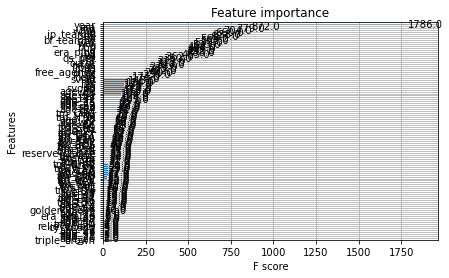

In [32]:
# show feature importance

%matplotlib inline
xgb.plot_importance(xgb_reg, ax=plt.gca()) # this looks terrible, too many inputs

In [41]:
#Training RMSE

pred_train = xgb_reg.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

273271.0507165589


In [42]:
# view the R2 of the training set

xgb_reg.score(X_train, y_train)

0.9948814672416549

In [43]:
# Testing RSME

prediction = xgb_reg.predict(X_test)
print(sqrt(mean_squared_error(y_test, prediction)))

5654064.078410951


In [44]:
# Testing R2

xgb_reg.score(X_test, y_test)

-0.690421584669948

At first run, the XG Boost looked to predict a much better result.  However, when the model was tested, the error got even larger than the Lasso or Ridge regressions. 

In [46]:
# hyperparameter tuning to improve model accuracy

param_test = {
    'min_child_weight':[6,10],
}


gsearch = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=4,
                                                   subsample=0.8, colsample_bytree=0.8,objective= 'reg:squarederror', 
                                                   nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test, 
                         scoring='neg_mean_squared_error',n_jobs=4, cv=2, verbose = 2)
gsearch.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=4, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=140,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None, ...),
             n_jobs=4, param_grid={'min_child_weight': [6, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [47]:
#Training MSE

pred_train = gsearch.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

2022566.6030598825


In [48]:
prediction = gsearch.predict(X_test)
print(sqrt(mean_squared_error(y_test, prediction)))

5116844.194378835


After hyperparameter tuning, there is really no change to the results.  The model has either too many inputs, or too many outliers, to produce good results.  Looking at the dataset, there are a number of inputs that are not evenly distributed.  In an attempt to get better results, we will run the same model with log transformation to help with the distribution of the variables.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'l'}>,
        <AxesSubplot:title={'center':'wl'}>,
        <AxesSubplot:title={'center':'era'}>,
        <AxesSubplot:title={'center':'g'}>,
        <AxesSubplot:title={'center':'gs'}>,
        <AxesSubplot:title={'center':'gf'}>,
        <AxesSubplot:title={'center':'cg'}>,
        <AxesSubplot:title={'center':'sho'}>,
        <AxesSubplot:title={'center':'sv'}>],
       [<AxesSubplot:title={'center':'era_plus'}>,
        <AxesSubplot:title={'center':'fip'}>,
        <AxesSubplot:title={'center':'whip'}>,
        <AxesSubplot:title={'center':'h9'}>,
        <AxesSubplot:title={'center':'hr9'}>,
        <AxesSubplot:title={'center':'bbp'}>,
        <AxesSubplot:title={'center':'so9'}>,
        <AxesSubplot:title={'center':'sow'}>,
        <AxesSubplot:title={'center':'wgs'}>,
        <AxesSubplot:title={'center':'lgs'}>,
        <AxesSubplot:title={'center':'

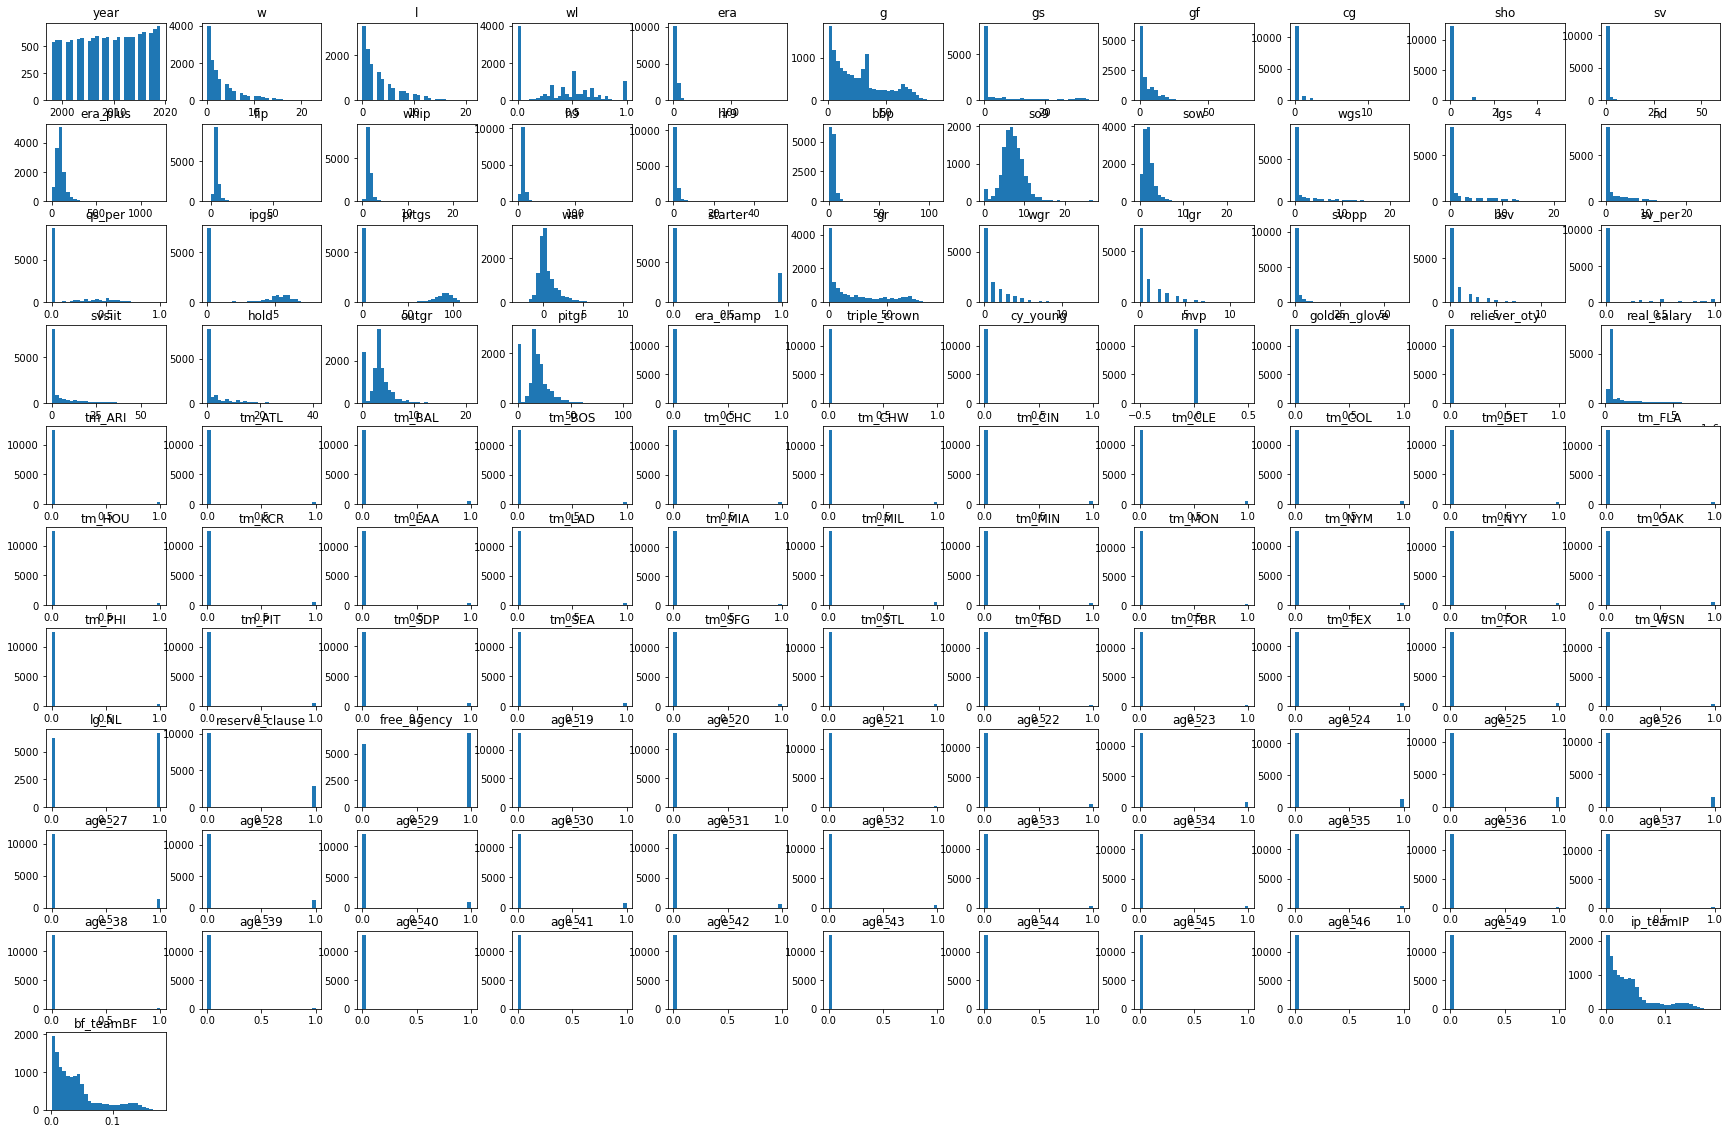

In [122]:
df.hist(grid=False,
       figsize=(30, 20),
       bins=30)

### LOG TRANSFORMATION

In [60]:
#create log-transformed data

X_train = np.sqrt(X_train)
X_train

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF
0,44.698993,4.242641,3.000000,0.816701,1.489966,5.830952,5.830952,0.000000,3.000000,2.236068,0.000000,13.674794,1.676305,0.989949,2.683282,0.707107,1.264911,2.701851,2.128380,4.242641,3.000000,2.645751,0.888819,2.720294,9.848858,2.569047,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.417760,0.406706
1,44.698993,4.472136,2.449490,0.876926,1.627882,5.744563,5.744563,0.000000,2.236068,1.732051,0.000000,13.190906,1.627882,1.046422,2.549510,0.632456,1.843909,3.224903,1.754993,4.472136,2.449490,2.645751,0.854400,2.664583,10.723805,2.846050,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399829,0.388961
2,44.698993,4.123106,1.732051,0.921954,1.702939,5.099020,5.099020,0.000000,1.414214,1.414214,0.000000,12.000000,1.646208,1.061603,2.792848,0.707107,1.549193,3.049590,1.982423,4.123106,1.732051,2.449490,0.806226,2.529822,9.643651,1.816590,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.340964,0.337828
3,44.698993,4.358899,2.645751,0.854985,1.700000,5.744563,5.744563,0.000000,1.732051,1.414214,0.000000,12.767145,1.843909,1.044509,2.683282,1.000000,1.612452,3.114482,1.936492,4.358899,2.645751,2.645751,0.871780,2.664583,10.630146,2.701851,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402983,0.393524
4,44.698993,4.472136,2.449490,0.876926,1.571623,5.744563,5.744563,0.000000,2.000000,1.732051,0.000000,12.961481,1.870829,1.096814,2.810694,0.707107,1.702939,2.489980,1.456022,4.472136,2.449490,2.645751,0.888819,2.626785,10.392305,2.469818,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399119,0.395636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [61]:
# verify no NaN values after transformation

X_train[X_train.isna().any(axis=1)]

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF
14,44.698993,2.828427,4.000000,0.577062,2.521904,6.082763,5.196152,2.000000,1.0,0.0,1.000000,8.485281,2.455606,1.317953,3.405877,1.264911,2.000000,1.923538,0.959166,2.828427,3.872983,2.000000,0.640312,2.387467,9.695360,NaN,1.0,3.162278,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.387467,5.656854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.346025,0.354883
21,44.698993,1.000000,1.414214,0.577062,2.792848,1.732051,1.732051,0.000000,0.0,0.0,0.000000,7.874008,2.395830,1.316435,3.549648,1.341641,1.732051,2.323790,1.341641,1.000000,1.414214,0.000000,0.000000,2.236068,9.539392,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102201,0.104085
25,44.698993,2.236068,1.414214,0.844985,2.459675,7.071068,0.000000,4.358899,0.0,0.0,1.414214,8.366600,2.334524,1.300000,3.255764,1.183216,2.167948,2.529822,1.170470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,7.071068,2.236068,1.414214,2.449490,2.000000,0.574456,3.741657,2.645751,1.870829,4.358899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.199451,0.206217
29,44.698993,0.000000,1.000000,0.000000,3.190611,5.196152,0.000000,4.123106,0.0,0.0,2.828427,6.480741,2.696294,1.583667,2.828427,0.948683,3.820995,3.114482,0.818535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,5.196152,0.000000,1.000000,2.828427,0.000000,1.000000,3.162278,0.000000,1.516575,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.118219,0.137614
43,44.698993,0.000000,1.414214,0.000000,3.316625,1.414214,1.414214,0.000000,0.0,0.0,0.000000,7.000000,2.218107,1.452928,4.123106,1.000000,1.414214,1.732051,1.224745,0.000000,1.414214,0.000000,0.000000,2.121320,9.110434,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079272,0.085606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [62]:
# drop NaN values

X_train = X_train.drop(['war', 'fip'], axis=1)

In [63]:
# verify that the values were dropped

X_train[X_train.isna().any(axis=1)] # no NaN values in transformed set

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF


In [65]:
# repeat the process for the test set

#create log-transformed data
X_test = np.sqrt(X_test)

# check for NaN values
X_test[X_test.isna().any(axis=1)]

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF
11523,6.700738,1.732051,1.681793,0.852833,1.527213,2.340347,2.087798,1.414214,1.0,1.0,0.000000,2.952592,1.483240,1.112356,1.808614,1.046635,1.326907,1.510083,1.135081,1.681793,1.626577,1.414214,0.827989,1.538321,3.080070,NaN,1.0,1.821160,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.551876,2.432299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544101,0.547170
11527,6.700738,1.414214,1.495349,0.816292,1.553879,2.514867,1.495349,1.626577,0.0,0.0,1.000000,3.018349,1.462906,1.133883,1.804374,0.880112,1.440015,1.487815,1.033299,1.000000,1.189207,1.189207,0.668740,1.414214,2.882121,NaN,0.0,2.432299,1.316074,1.316074,1.414214,1.316074,0.707107,1.681793,1.316074,1.347809,2.030543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.449226,0.456452
11530,6.700738,0.000000,0.000000,0.000000,2.059767,1.000000,1.000000,0.000000,0.0,0.0,0.000000,2.258101,2.054310,1.277926,2.059767,1.732051,1.565085,1.565085,1.000000,0.000000,0.000000,1.000000,0.000000,1.316074,2.747696,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212937,0.234693
11532,6.700738,0.000000,1.189207,0.000000,1.881804,1.189207,1.189207,0.000000,0.0,0.0,0.000000,2.482824,1.763879,1.209917,1.951381,1.405291,1.480166,1.304967,0.880112,0.000000,1.189207,0.000000,0.000000,1.472395,3.113737,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281802,0.296796
11536,6.700738,1.316074,1.189207,0.880112,1.511533,2.892508,0.000000,2.030543,0.0,0.0,1.495349,3.045262,1.397112,1.095825,1.764790,0.974004,1.347809,1.717433,1.274679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,2.892508,1.316074,1.189207,1.626577,1.189207,0.917941,2.236068,2.030543,1.269823,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451122,0.451713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [66]:
# drop NaN values

X_test = X_test.drop(['war', 'fip'], axis=1)

# verify they have been dropped 

X_test[X_test.isna().any(axis=1)] # no NaN values

,year,w,l,wl,era,g,gs,gf,cg,sho,sv,era_plus,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_49,ip_teamIP,bf_teamBF


In [67]:
# import the necessary package
# run lasso regression
# fit the model 

from sklearn.linear_model import Ridge, Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\gowgi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+16, tolerance: 1.681e+13
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [68]:
# print the training and testing errors for the Lasso Regression Model

import math
from math import sqrt
from sklearn.metrics import mean_squared_error

print("Training Error:")
print(sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))))
testing_predictions_linear = lasso_reg.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
2806124.986927571
Testing Error:
303650430.8300002


In [69]:
# establish parameters
# Finetune with GridSearch

from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01, 0.1, 1, 5, 10]}
lasso_gs = GridSearchCV(lasso_reg,
                       params,
                       cv=5,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1)

# fit to our model

lasso_gs.fit(X_train, y_train)

C:\Users\gowgi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e+16, tolerance: 1.681e+13
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [70]:
# print the training and testing errors for the fine tuned model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, lasso_gs.predict(X_train))))
testing_predictions_linear = lasso_gs.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
2806170.9365374167
Testing Error:
303298067.6075825


Normalizing the data with log transformation only made it worse.  We did not continue testing this direction as there were no improvements made.  This did make us think more about outliers, however.  The max salary value within the data set is $37.0MM with the lowest value at $100,000.  This gives us a mean salary of $1.9M.  That made us think that those gigantic outliers in the data was causing problems and not allowing the model to perform well on the testing set.  To trim the outliers, we eliminated any player from the data set that earned mmore than one standard deviation from the mean salary.

In [125]:
# reimport the data set 
# ensure that it is complete and original

df1 = pd.read_csv('590_one_stan.csv')

In [128]:
# check salary mean and standard deviation

df.describe()

,year,age,salary,cpi,w,l,wl,era,g,gs,gf,cg,sho,sv,ip,bf,era_plus,fip,whip,h9,hr9,bbp,so9,sow,wgs,lgs,nd,qs_per,ipgs,pitgs,war,starter,gr,wgr,lgr,svopp,bsv,sv_per,svsiit,hold,outgr,pitgr,era_champ,triple_crown,cy_young,mvp,golden_glove,reliever_oty,team_IP,team_bf
count,14404.000000,14404.000000,1.440400e+04,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14402.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000,14404.000000
mean,2009.060400,28.017356,1.914667e+06,213.206725,3.597751,3.592960,0.391883,5.383334,27.614482,7.242224,6.848861,0.224035,0.087962,1.821647,63.865010,275.566995,104.379617,4.884161,1.550349,9.845605,1.282519,4.111976,7.167099,2.173659,2.503263,2.553388,2.185782,0.167017,2.421834,40.345598,0.627590,0.324840,20.373230,1.094557,1.039642,2.698139,0.876493,0.135709,5.976257,3.071438,2.958206,16.981739,0.003055,0.000486,0.003055,0.000139,0.003124,0.002985,1444.921779,6222.800403
std,6.369337,4.115392,3.465243e+06,28.177590,4.335904,3.762203,0.307814,5.714502,21.211607,11.095916,11.307613,0.792331,0.369792,6.735049,60.764164,256.181570,62.532276,2.628345,0.786951,5.057429,1.409057,3.463113,2.751871,1.431927,4.517602,3.978942,3.422269,0.244642,2.737201,44.898305,1.427634,0.468331,24.136964,1.764029,1.643300,7.809078,1.649266,0.291170,10.603925,5.831889,2.316330,13.101888,0.055187,0.022040,0.055187,0.011783,0.055808,0.054558,13.376732,119.255437
min,1998.000000,19.000000,1.000000e+05,163.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1411.200000,5866.000000
25%,2004.000000,25.000000,3.900000e+05,188.910000,0.000000,1.000000,0.000000,3.380000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.200000,76.000000,72.000000,3.670000,1.237000,7.800000,0.700000,2.600000,5.500000,1.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1436.000000,6141.000000
50%,2009.000000,27.000000,5.096750e+05,215.250000,2.000000,2.000000,0.429000,4.440000,24.000000,0.000000,2.000000,0.000000,0.000000,0.000000,46.100000,202.000000,96.000000,4.440000,1.418000,9.100000,1.100000,3.500000,7.000000,1.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1444.100000,6219.000000
75%,2015.000000,30.000000,1.687500e+06,237.000000,5.000000,6.000000,0.600000,5.860000,38.000000,12.000000,9.000000,0.000000,0.000000,0.000000,83.200000,359.000000,123.000000,5.380000,1.660000,10.700000,1.500000,4.700000,8.700000,2.712500,3.000000,4.000000,4.000000,0.370000,5.400000,90.000000,1.100000,1.000000,36.000000,2.000000,2.000000,2.000000,1.000000,0.000000,7.000000,3.000000,3.900000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1453.200000,6305.000000
max,2019.000000,49.000000,3.750556e+07,255.650000,24.000000,21.000000,1.000000,189.000000,94.000000,36.000000,79.000000,15.000000,6.000000,62.000000,271.200000,1102.000000,1221.000000,84.210000,24.000000,189.000000,54.00000

The mean salary in the data set is ($1,914,667) with a standard deviation of $3,465,243.  If we want to eliminate any player that earns more than one standard deviation from the mean, we need to drop all players that earned more than $5,379,910.

In [129]:
df1

,name,code,year,age,tm,lg,salary,cpi,wl,era,g,cg,sho,sv,ip,bf,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,team_IP,team_bf
0,Mark Clark,clarkma01,1998,30,CHC,NL,5050000,163.01,0.391,4.84,33,2,1,0,213.2,918,3.76,1.329,6.8,3.35,0.39,1.9,1,0,0.0,0,0.0,1477.1,6472
1,Jeff Fassero,fasseje01,1998,35,SEA,AL,5016667,163.01,0.520,3.97,32,7,0,0,224.2,954,4.50,1.286,7.1,2.67,0.44,4.1,1,0,0.0,0,0.0,1424.1,6271
2,Jaime Navarro,navarja01,1998,31,CHW,AL,5000000,163.01,0.333,6.36,37,1,0,1,172.2,802,6.03,1.737,3.7,0.92,0.41,-1.7,1,0,1.0,0,5.7,1438.2,6368
3,Ken Hill,hillke01,1998,32,ANA,AL,5000000,163.01,0.600,4.98,19,0,0,0,103.0,458,4.25,1.650,5.0,1.21,0.58,1.7,1,0,0.0,0,0.0,1444.0,6326
4,Juan Guzman,guzmaju01,1998,31,TOR,AL,5000000,163.01,0.333,4.41,22,2,0,0,145.0,632,4.75,1.366,7.0,1.74,0.59,2.3,1,0,0.0,0,0.0,1465.0,6352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,Ross Detwiler,detwiro01,2019,33,CHW,AL,100000,255.65,0.375,6.59,18,0,0,0,69.2,315,6.92,1.622,5.9,1.70,0.17,-0.4,1,0,0.0,0,6.3,1412.2,6159
12884,Francisco Liriano,liriafr01,2019,35,PIT,NL,100000,255.65,0.625,3.47,69,0,0,0,70.0,301,4.53,1.357,8.1,1.80,0.00,1.2,0,4,0.0,12,3.0,1440.0,6391
12885,Tyler Clippard,clippty01,2019,34,CLE,AL,100000,255.65,1.000,2.90,53,0,0,0,62.0,241,3.89,0.855,9.3,4.27,0.00,1.4,0,0,0.0,8,3.4,1437.2,6008
12886,Ervin Santana,santaer01,2019,36,CHW,AL,100000,255.65,0.000,9.45,3,0,0,0,13.1,64,9.66,1.875,3.4,0.83,0.00,-0.4,1,0,0.0,0,0.0,1412.2,6159


The major outliers have been removed, but we still are faced with having way too many iputs in the dataset.  To take care of this, we used Mutual Information Regression.  This uses entropy to determine the dependency of one variable on another.  We will take the top 30% of the variables in the dataset and use them to train our model.  First, we clean and prepare the data like above.

In [130]:
# data was previously cleaned, but still verify
# check for any missing values

df1[df1.isna().any(axis=1)]

,name,code,year,age,tm,lg,salary,cpi,wl,era,g,cg,sho,sv,ip,bf,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,team_IP,team_bf


In [131]:
# fill in missing values with zero

df1 = df1.fillna(0)

In [133]:
# verify all NaN values have been replaced

df1[df1.isna().any(axis=1)] # all NaN values have been replaced

,name,code,year,age,tm,lg,salary,cpi,wl,era,g,cg,sho,sv,ip,bf,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,team_IP,team_bf


In [134]:
# convert salary to 2019 dollars

df1['real_salary']=((df1['salary']*255.65)/(df1['cpi']))
df1

,name,code,year,age,tm,lg,salary,cpi,wl,era,g,cg,sho,sv,ip,bf,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,team_IP,team_bf,real_salary
0,Mark Clark,clarkma01,1998,30,CHC,NL,5050000,163.01,0.391,4.84,33,2,1,0,213.2,918,3.76,1.329,6.8,3.35,0.39,1.9,1,0,0.0,0,0.0,1477.1,6472,7.919959e+06
1,Jeff Fassero,fasseje01,1998,35,SEA,AL,5016667,163.01,0.520,3.97,32,7,0,0,224.2,954,4.50,1.286,7.1,2.67,0.44,4.1,1,0,0.0,0,0.0,1424.1,6271,7.867682e+06
2,Jaime Navarro,navarja01,1998,31,CHW,AL,5000000,163.01,0.333,6.36,37,1,0,1,172.2,802,6.03,1.737,3.7,0.92,0.41,-1.7,1,0,1.0,0,5.7,1438.2,6368,7.841543e+06
3,Ken Hill,hillke01,1998,32,ANA,AL,5000000,163.01,0.600,4.98,19,0,0,0,103.0,458,4.25,1.650,5.0,1.21,0.58,1.7,1,0,0.0,0,0.0,1444.0,6326,7.841543e+06
4,Juan Guzman,guzmaju01,1998,31,TOR,AL,5000000,163.01,0.333,4.41,22,2,0,0,145.0,632,4.75,1.366,7.0,1.74,0.59,2.3,1,0,0.0,0,0.0,1465.0,6352,7.841543e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,Ross Detwiler,detwiro01,2019,33,CHW,AL,100000,255.65,0.375,6.59,18,0,0,0,69.2,315,6.92,1.622,5.9,1.70,0.17,-0.4,1,0,0.0,0,6.3,1412.2,6159,1.000000e+05
12884,Francisco Liriano,liriafr01,2019,35,PIT,NL,100000,255.65,0.625,3.47,69,0,0,0,70.0,301,4.53,1.357,8.1,1.80,0.00,1.2,0,4,0.0,12,3.0,1440.0,6391,1.000000e+05
12885,Tyler Clippard,clippty01,2019,34,CLE,AL,100000,255.65,1.000,2.90,53,0,0,0,62.0,241,3.89,0.855,9.3,4.27,0.00,1.4,0,0,0.0,8,3.4,1437.2,6008,1.000000e+05
12886,Ervin Santana,santaer01,2019,36,CHW,AL,100000,255.65,0.000,9.45,3,0,0,0,13.1,64,9.66,1.875,3.4,0.83,0.00,-0.4,1,0,0.0,0,0.0,1412.2,6159,1.000000e+05


In [135]:
# drop the original salary column
# our new outcome is real_salary

df1 = df1.drop(['salary','cpi'], axis=1)
df1

,name,code,year,age,tm,lg,wl,era,g,cg,sho,sv,ip,bf,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,team_IP,team_bf,real_salary
0,Mark Clark,clarkma01,1998,30,CHC,NL,0.391,4.84,33,2,1,0,213.2,918,3.76,1.329,6.8,3.35,0.39,1.9,1,0,0.0,0,0.0,1477.1,6472,7.919959e+06
1,Jeff Fassero,fasseje01,1998,35,SEA,AL,0.520,3.97,32,7,0,0,224.2,954,4.50,1.286,7.1,2.67,0.44,4.1,1,0,0.0,0,0.0,1424.1,6271,7.867682e+06
2,Jaime Navarro,navarja01,1998,31,CHW,AL,0.333,6.36,37,1,0,1,172.2,802,6.03,1.737,3.7,0.92,0.41,-1.7,1,0,1.0,0,5.7,1438.2,6368,7.841543e+06
3,Ken Hill,hillke01,1998,32,ANA,AL,0.600,4.98,19,0,0,0,103.0,458,4.25,1.650,5.0,1.21,0.58,1.7,1,0,0.0,0,0.0,1444.0,6326,7.841543e+06
4,Juan Guzman,guzmaju01,1998,31,TOR,AL,0.333,4.41,22,2,0,0,145.0,632,4.75,1.366,7.0,1.74,0.59,2.3,1,0,0.0,0,0.0,1465.0,6352,7.841543e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,Ross Detwiler,detwiro01,2019,33,CHW,AL,0.375,6.59,18,0,0,0,69.2,315,6.92,1.622,5.9,1.70,0.17,-0.4,1,0,0.0,0,6.3,1412.2,6159,1.000000e+05
12884,Francisco Liriano,liriafr01,2019,35,PIT,NL,0.625,3.47,69,0,0,0,70.0,301,4.53,1.357,8.1,1.80,0.00,1.2,0,4,0.0,12,3.0,1440.0,6391,1.000000e+05
12885,Tyler Clippard,clippty01,2019,34,CLE,AL,1.000,2.90,53,0,0,0,62.0,241,3.89,0.855,9.3,4.27,0.00,1.4,0,0,0.0,8,3.4,1437.2,6008,1.000000e+05
12886,Ervin Santana,santaer01,2019,36,CHW,AL,0.000,9.45,3,0,0,0,13.1,64,9.66,1.875,3.4,0.83,0.00,-0.4,1,0,0.0,0,0.0,1412.2,6159,1.000000e+05


In [136]:
# create dummy variables for year, team, league

df1 = pd.get_dummies(df1, columns=['tm', 'lg'], drop_first=True )
df1

,name,code,year,age,wl,era,g,cg,sho,sv,ip,bf,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,team_IP,team_bf,real_salary,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL
0,Mark Clark,clarkma01,1998,30,0.391,4.84,33,2,1,0,213.2,918,3.76,1.329,6.8,3.35,0.39,1.9,1,0,0.0,0,0.0,1477.1,6472,7.919959e+06,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Jeff Fassero,fasseje01,1998,35,0.520,3.97,32,7,0,0,224.2,954,4.50,1.286,7.1,2.67,0.44,4.1,1,0,0.0,0,0.0,1424.1,6271,7.867682e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Jaime Navarro,navarja01,1998,31,0.333,6.36,37,1,0,1,172.2,802,6.03,1.737,3.7,0.92,0.41,-1.7,1,0,1.0,0,5.7,1438.2,6368,7.841543e+06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ken Hill,hillke01,1998,32,0.600,4.98,19,0,0,0,103.0,458,4.25,1.650,5.0,1.21,0.58,1.7,1,0,0.0,0,0.0,1444.0,6326,7.841543e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Juan Guzman,guzmaju01,1998,31,0.333,4.41,22,2,0,0,145.0,632,4.75,1.366,7.0,1.74,0.59,2.3,1,0,0.0,0,0.0,1465.0,6352,7.841543e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,Ross Detwiler,detwiro01,2019,33,0.375,6.59,18,0,0,0,69.2,315,6.92,1.622,5.9,1.70,0.17,-0.4,1,0,0.0,0,6.3,1412.2,6159,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12884,Francisco Liriano,liriafr01,2019,35,0.625,3.47,69,0,0,0,70.0,301,4.53,1.357,8.1,1.80,0.00,1.2,0,4,0.0,12,3.0,1440.0,6391,1.000000e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
12885,Tyler Clippard,clippty01,2019,34,1.000,2.90,53,0,0,0,62.0,241,3.89,0.855,9.3,4.27,0.00,1.4,0,0,0.0,8,3.4,1437.2,6008,1.000000e+05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12886,Ervin Santana,santaer01,2019,36,0.000,9.45,3,0,0,0,13.1,64,9.66,1.875,3.4,0.83,0.00,-0.4,1,0,0.0,0,0.0,1412.2,6159,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
# create reserve_clause and free_agency group dummy variables

df1['reserve_clause'] = (df1['age']<25).astype(int)
df1['free_agency']=(df1['age']>26).astype(int)

In [138]:
# create a dummy variable for age
df1 = pd.get_dummies(df1, columns=['age'])

In [139]:
# create a variable for pitcher durability/usage

df1['ip_teamIP'] = ((df1['ip'])/(df1['team_IP']))
df1['bf_teamBF'] = ((df1['bf'])/(df1['team_bf']))

In [140]:
# team variables are no longer necessary

df1=df1.drop(['team_IP','team_bf','bf','ip'], axis=1)
df1

,name,code,year,wl,era,g,cg,sho,sv,fip,whip,so9,sow,qs_per,war,starter,bsv,sv_per,hold,outgr,real_salary,tm_ARI,tm_ATL,tm_BAL,tm_BOS,tm_CHC,tm_CHW,tm_CIN,tm_CLE,tm_COL,tm_DET,tm_FLA,tm_HOU,tm_KCR,tm_LAA,tm_LAD,tm_MIA,tm_MIL,tm_MIN,tm_MON,tm_NYM,tm_NYY,tm_OAK,tm_PHI,tm_PIT,tm_SDP,tm_SEA,tm_SFG,tm_STL,tm_TBD,tm_TBR,tm_TEX,tm_TOR,tm_WSN,lg_NL,reserve_clause,free_agency,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_49,ip_teamIP,bf_teamBF
0,Mark Clark,clarkma01,1998,0.391,4.84,33,2,1,0,3.76,1.329,6.8,3.35,0.39,1.9,1,0,0.0,0,0.0,7.919959e+06,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.144337,0.141842
1,Jeff Fassero,fasseje01,1998,0.520,3.97,32,7,0,0,4.50,1.286,7.1,2.67,0.44,4.1,1,0,0.0,0,0.0,7.867682e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.157433,0.152129
2,Jaime Navarro,navarja01,1998,0.333,6.36,37,1,0,1,6.03,1.737,3.7,0.92,0.41,-1.7,1,0,1.0,0,5.7,7.841543e+06,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.119733,0.125942
3,Ken Hill,hillke01,1998,0.600,4.98,19,0,0,0,4.25,1.650,5.0,1.21,0.58,1.7,1,0,0.0,0,0.0,7.841543e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.071330,0.072400
4,Juan Guzman,guzmaju01,1998,0.333,4.41,22,2,0,0,4.75,1.366,7.0,1.74,0.59,2.3,1,0,0.0,0,0.0,7.841543e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.098976,0.099496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,Ross Detwiler,detwiro01,2019,0.375,6.59,18,0,0,0,6.92,1.622,5.9,1.70,0.17,-0.4,1,0,0.0,0,6.3,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049002,0.051145
12884,Francisco Liriano,liriafr01,2019,0.625,3.47,69,0,0,0,4.53,1.357,8.1,1.80,0.00,1.2,0,4,0.0,12,3.0,1.000000e+05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.048611,0.047097
12885,Tyler Clippard,clippty01,2019,1.000,2.90,53,0,0,0,3.89,0.855,9.3,4.27,0.00,1.4,0,0,0.0,8,3.4,1.000000e+05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.043139,0.040113
12886,Ervin Santana,santaer01,2019,0.000,9.45,3,0,0,0,9.66,1.875,3.4,0.83,0.00,-0.4,1,0,0.0,0,0.0,1.000000e+05,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.009276,0.010391


In [148]:
# create the training and test sets

x = df1.drop(['real_salary', 'name', 'code','year'], axis=1)
y = df1['real_salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [149]:
# split the training and test sets 80% and 20%

X_train = x[:int(x.shape[0]*0.8)]
X_test = x[int(x.shape[0]*0.8):]
y_train = y[:int(x.shape[0]*0.8)]
y_test = y[int(x.shape[0]*0.8):]

### Mutual Information Regression

In [150]:
# use mutual information for feature selection

from sklearn.feature_selection import mutual_info_regression

mut_info = mutual_info_regression(X_train, y_train)
mut_info = pd.Series(mut_info)
mut_info.index=X_train.columns
mut_info.sort_values(ascending=False)

g              0.134228
ip_teamIP      0.128265
bf_teamBF      0.119455
free_agency    0.119411
sow            0.085993
                 ...   
age_45         0.000000
age_46         0.000000
tm_CHW         0.000000
tm_CHC         0.000000
tm_SEA         0.000000
Length: 84, dtype: float64

In [151]:
# set the percentile threshold for the regression
# chose the 40th percentile

from sklearn.feature_selection import SelectPercentile
top_col=SelectPercentile(mutual_info_regression, percentile=40)
top_col.fit(X_train, y_train)
X_train.columns[top_col.get_support()]

Index(['wl', 'era', 'g', 'cg', 'sv', 'fip', 'whip', 'so9', 'sow', 'qs_per',
       'war', 'bsv', 'sv_per', 'hold', 'outgr', 'tm_FLA', 'tm_MIA', 'tm_NYM',
       'tm_PIT', 'reserve_clause', 'free_agency', 'age_22', 'age_23', 'age_24',
       'age_25', 'age_26', 'age_27', 'age_31', 'age_32', 'age_33', 'age_34',
       'age_43', 'ip_teamIP', 'bf_teamBF'],
      dtype='object')

In [152]:
# adjust the the training set to only inlcude the features from the previous step

X_train = X_train[['wl', 'era', 'g', 'cg', 'sv', 'fip', 'whip', 'so9', 'sow', 'qs_per',
       'war', 'bsv', 'sv_per', 'hold', 'outgr', 'tm_FLA', 'tm_MIA', 'tm_NYM',
       'tm_PIT', 'reserve_clause', 'free_agency', 'age_22', 'age_23', 'age_24',
       'age_25', 'age_26', 'age_27', 'age_31', 'age_32', 'age_33', 'age_34',
       'age_43', 'ip_teamIP', 'bf_teamBF']]
X_train

,wl,era,g,cg,sv,fip,whip,so9,sow,qs_per,war,bsv,sv_per,hold,outgr,tm_FLA,tm_MIA,tm_NYM,tm_PIT,reserve_clause,free_agency,age_22,age_23,age_24,age_25,age_26,age_27,age_31,age_32,age_33,age_34,age_43,ip_teamIP,bf_teamBF
0,0.391,4.84,33,2,0,3.76,1.329,6.8,3.35,0.39,1.9,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.144337,0.141842
1,0.520,3.97,32,7,0,4.50,1.286,7.1,2.67,0.44,4.1,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.157433,0.152129
2,0.333,6.36,37,1,1,6.03,1.737,3.7,0.92,0.41,-1.7,0,1.0,0,5.7,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.119733,0.125942
3,0.600,4.98,19,0,0,4.25,1.650,5.0,1.21,0.58,1.7,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.071330,0.072400
4,0.333,4.41,22,2,0,4.75,1.366,7.0,1.74,0.59,2.3,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.098976,0.099496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,0.667,3.14,32,3,0,3.26,1.056,9.5,3.98,0.69,5.6,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.148789,0.142549
10306,0.600,3.97,68,0,3,4.01,1.447,8.2,2.00,0.00,0.9,7,0.3,15,2.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.045496,0.047038
10307,0.579,3.32,25,1,0,3.72,1.148,9.2,4.41,0.56,3.0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.101107,0.099287
10308,0.375,5.71,19,0,0,5.54,1.529,6.4,2.23,0.17,-0.6,0,0.0,1,4.3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.047886,0.049256


In [153]:
# adjust the test set to only inlcude the selected features

X_test = X_test[['wl', 'era', 'g', 'cg', 'sv', 'fip', 'whip', 'so9', 'sow', 'qs_per',
       'war', 'bsv', 'sv_per', 'hold', 'outgr', 'tm_FLA', 'tm_MIA', 'tm_NYM',
       'tm_PIT', 'reserve_clause', 'free_agency', 'age_22', 'age_23', 'age_24',
       'age_25', 'age_26', 'age_27', 'age_31', 'age_32', 'age_33', 'age_34',
       'age_43', 'ip_teamIP', 'bf_teamBF']]
X_test

,wl,era,g,cg,sv,fip,whip,so9,sow,qs_per,war,bsv,sv_per,hold,outgr,tm_FLA,tm_MIA,tm_NYM,tm_PIT,reserve_clause,free_agency,age_22,age_23,age_24,age_25,age_26,age_27,age_31,age_32,age_33,age_34,age_43,ip_teamIP,bf_teamBF
10310,0.200,6.15,20,1,0,4.87,1.673,6.2,1.67,0.20,-0.4,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.069602,0.071462
10311,0.286,4.86,17,0,0,3.47,1.468,7.4,3.04,0.41,-0.1,0,0.0,0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.063718,0.066260
10312,0.333,4.82,32,0,0,3.79,1.349,10.6,3.91,0.34,1.1,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.122680,0.125519
10313,0.500,2.74,50,0,0,4.35,1.279,9.0,1.89,0.00,1.0,1,0.0,4,3.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.044682,0.047868
10314,0.250,6.19,34,0,1,6.62,1.658,9.5,2.19,0.15,-0.9,0,1.0,1,4.7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.061250,0.065675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12883,0.375,6.59,18,0,0,6.92,1.622,5.9,1.70,0.17,-0.4,0,0.0,0,6.3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.049002,0.051145
12884,0.625,3.47,69,0,0,4.53,1.357,8.1,1.80,0.00,1.2,4,0.0,12,3.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.048611,0.047097
12885,1.000,2.90,53,0,0,3.89,0.855,9.3,4.27,0.00,1.4,0,0.0,8,3.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.043139,0.040113
12886,0.000,9.45,3,0,0,9.66,1.875,3.4,0.83,0.00,-0.4,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.009276,0.010391


<AxesSubplot:>

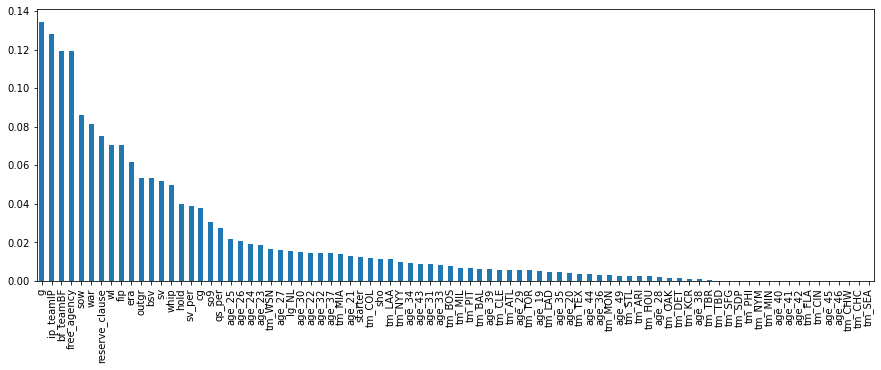

In [154]:
# get a visual of the most important features

mut_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

### LASSO REGRESSION

In [155]:
# run lasso regression
# fit the model 

from sklearn.linear_model import Ridge, Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

C:\Users\gowgi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.841e+15, tolerance: 2.121e+12
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [156]:
# print the training and testing errors for the Lasso Regression Model

import math
from math import sqrt
from sklearn.metrics import mean_squared_error

print("Training Error:")
print(sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))))
testing_predictions_linear = lasso_reg.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
1163813.6233075918
Testing Error:
888315.0279613023


In [157]:
# establish parameters
# Finetune with GridSearch

from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01, 0.1, 1, 5, 10]}
lasso_gs = GridSearchCV(lasso_reg,
                       params,
                       cv=5,
                       scoring='neg_root_mean_squared_error',
                       n_jobs=-1)

# fit to our model

lasso_gs.fit(X_train, y_train)

C:\Users\gowgi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.980e+15, tolerance: 2.121e+12
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [158]:
# print the training and testing errors for the fine tuned model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, lasso_gs.predict(X_train))))
testing_predictions_linear = lasso_gs.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
1163782.0572957902
Testing Error:
888329.847793771


In [159]:
# show RSME for each alpha level

means = lasso_gs.cv_results_['mean_test_score']
params = lasso_gs.cv_results_['params']

for mean, param in zip (means, params):
    print("%f with %r" % (mean, param))

-1164899.835013 with {'alpha': 0.01}
-1164902.455342 with {'alpha': 0.1}
-1164929.022369 with {'alpha': 1}
-1165055.177496 with {'alpha': 5}
-1165231.298671 with {'alpha': 10}


# Ridge Regression

In [160]:
# import the necessary package
# run ridge regression
# fit the model 

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [161]:
# print the training and testing errors for the Ridge Regression Model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, ridge.predict(X_train))))
testing_predictions_linear = ridge.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
1168727.0409005482
Testing Error:
887979.9201636148


In [162]:
# establish parameters
# Finetune with GridSearch

params = {'alpha':[0.01, 0.1, 1, 5, 10]}
ridge_gs = GridSearchCV(ridge,
                       params,
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = -1, cv = 5)

# fit to our model

ridge_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_root_mean_squared_error')

In [163]:
# print training and testing MSE for fine tuned ridge regression model

print("Training Error:")
print(sqrt(mean_squared_error(y_train, ridge_gs.predict(X_train))))
testing_predictions_linear = ridge_gs.predict(X_test)
print("Testing Error:")
print(sqrt(mean_squared_error(y_test, testing_predictions_linear)))

Training Error:
1164610.8597744352
Testing Error:
888147.1628112543


In [164]:
# show RSME for each alpha level

means = ridge_gs.cv_results_['mean_test_score']
params = ridge_gs.cv_results_['params']

for mean, param in zip (means, params):
    print("%f with %r" % (mean, param))

-1166038.652952 with {'alpha': 0.01}
-1168704.010772 with {'alpha': 0.1}
-1169586.984464 with {'alpha': 1}
-1173982.102938 with {'alpha': 5}
-1177772.337575 with {'alpha': 10}


# XG BOOST

In [165]:
from xgboost import XGBRegressor
import xgboost as xgb

xgb_reg = XGBRegressor(n_estimators=200)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

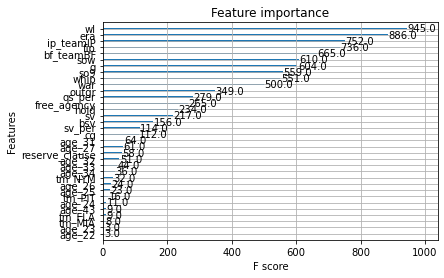

In [166]:
%matplotlib inline
xgb.plot_importance(xgb_reg, ax=plt.gca())

In [168]:
#Training MSE
pred_train = xgb_reg.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

368118.38749965484


In [169]:
prediction = xgb_reg.predict(X_test)
print(sqrt(mean_squared_error(y_test, prediction)))

931135.9610354846


In [170]:
param_test = {
    'min_child_weight':[6,10],
}


gsearch = GridSearchCV(estimator = XGBRegressor( learning_rate=0.05, n_estimators=200, max_depth=10,
                                                   subsample=0.8, colsample_bytree=0.8,objective= 'reg:squarederror', 
                                                   nthread=4, scale_pos_weight=1,seed=27), param_grid = param_test, 
                         scoring='neg_mean_squared_error',n_jobs=10, cv=5, verbose = 2)
gsearch.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=200,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None, ...),
             n_jobs=10, param_grid={'min_child_weight': [6, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [171]:
#Training MSE
pred_train = gsearch.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

639035.4676151826


In [172]:
prediction = gsearch.predict(X_test)
print(sqrt(mean_squared_error(y_test, prediction)))

863185.2416368468


By trimmimg the dataset of the salary outliers, and using the mutual information regression, we were able to get much better results.  The model no longer overfits the training data.  The error is still high, as the test on the XG Boost gave an RSME of 863,185.  However, we have gone from prediction values of negative salaries, to keeping the predictions under the mean.  It is not the strongest model and it needs more work.  There is a wealth of statistical information on baseball pitchers and their performance, but it is highly likely that their salary consists of factors that we were not able to obtain.  Athletes are "stars" that people pay to see.  Popularity of a player can affect their salary.  It would be interesting to add a variable for popularity.  While that is tough to capture, adding merchandise sales or number of endorsements could help with that.  

Lastly, baseball palyers move from the minors to the majors quite frequently.  In this case, we are left with missing entries for those players that have been bumped down.  A good performance in the minor leagues will affect a players salary in the major leagues.  Adding in minor league statistics for those missing years may also help improve the model.